# CSC494 - Final Project
## American Sign Language Recognizer

# Dataset

In [1]:
import os
import numpy as np
dataset_dir = f'{os.getcwd()}/../dataset'
path_to_training = f'{dataset_dir}/asl_alphabet_train/asl_alphabet_train/'
path_to_testing = f'{dataset_dir}/asl_alphabet_test/asl_alphabet_test/' # Lets use this for blind testing (i.e. the images were not used to validate during the training process)

f'[Path to training exists >> {os.path.exists(path_to_training)}]' \
f'[Path to testing exists >> {os.path.exists(path_to_testing)}]'

'[Path to training exists >> True][Path to testing exists >> True]'

In [2]:
categories = [f.name for f in os.scandir(path_to_training)]
categories

['D',
 'O',
 'M',
 'K',
 'Q',
 'Y',
 'J',
 'space',
 'I',
 'A',
 'S',
 'nothing',
 'L',
 'C',
 'U',
 'N',
 'W',
 'B',
 'H',
 'V',
 'F',
 'Z',
 'del',
 'T',
 'X',
 'R',
 'G',
 'E',
 'P']

2022-04-21 23:29:52.458360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-21 23:29:52.458406: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


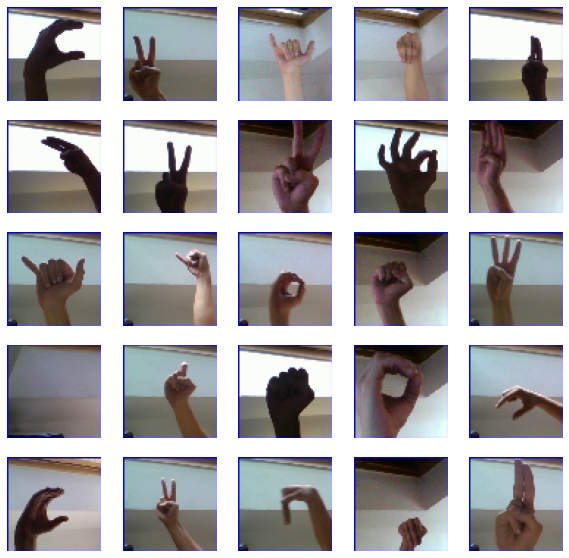

In [3]:
from image_cnn import ASLClassifier
asl_clf = ASLClassifier()
asl_clf.load_dataset(path_to_training, img_shape=(64, 64, 3))
asl_clf.display_25_img()

In [4]:
asl_clf.compile_model()

2022-04-21 23:29:58.968086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-21 23:29:58.968105: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-21 23:29:58.968120: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (levi-Q525UAR): /proc/driver/nvidia/version does not exist
2022-04-21 23:29:58.968282: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
asl_clf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [6]:
print(asl_clf.train_set)
print(asl_clf.test_set)

In [7]:
asl_history = asl_clf.train(epochs=3)

Epoch 1/3
1904/1904 [==============================] - 217s 113ms/step - loss: 1.4849 - accuracy: 0.5357 - val_loss: 1.5354 - val_accuracy: 0.5380
Epoch 2/3
1904/1904 [==============================] - 221s 116ms/step - loss: 0.4279 - accuracy: 0.8531 - val_loss: 1.3513 - val_accuracy: 0.6136
Epoch 3/3
1904/1904 [==============================] - 225s 118ms/step - loss: 0.2624 - accuracy: 0.9092 - val_loss: 1.2631 - val_accuracy: 0.6348


In [8]:
prediction = asl_clf.model.predict(asl_clf.test_set)

In [9]:
prediction

array([[1.0000000e+00, 2.2668445e-01, 1.2645125e-04, ..., 5.0670179e-09,
        1.2397468e-03, 6.4257586e-07],
       [1.0000000e+00, 2.5092420e-01, 3.9384642e-05, ..., 1.0542640e-08,
        6.6996515e-03, 1.3390533e-07],
       [1.0000000e+00, 6.4920485e-03, 2.3329865e-05, ..., 1.0856401e-09,
        2.0720661e-03, 1.3272771e-06],
       ...,
       [5.4721832e-03, 2.7956139e-05, 4.1884050e-05, ..., 4.1332299e-01,
        3.1321555e-02, 8.6665595e-01],
       [4.4608712e-03, 1.9373851e-05, 3.9906474e-05, ..., 5.3383052e-01,
        2.0758599e-02, 9.5090210e-01],
       [4.0228665e-03, 1.2878472e-05, 3.0567604e-05, ..., 6.0096556e-01,
        8.4761679e-03, 9.7725725e-01]], dtype=float32)

In [10]:
asl_clf.test_set.classes

array([ 0,  0,  0, ..., 28, 28, 28], dtype=int32)

In [11]:
pred_classes = []

In [12]:
asl_pred = np.argmax(prediction, axis=1)
asl_pred

array([ 0,  0,  0, ..., 12, 12, 28])

Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       803
           1       0.70      0.92      0.79       679
           2       0.97      0.99      0.98       885
           3       0.93      0.85      0.89       978
           4       0.68      0.44      0.54      1384
           5       0.95      1.00      0.97       851
           6       0.82      0.63      0.71      1175
           7       0.48      0.68      0.56       633
           8       0.42      0.95      0.59       402
           9       0.85      0.78      0.81       976
          10       0.95      0.97      0.96       878
          11       0.99      0.87      0.92      1025
          12       0.34      0.38      0.36       805
          13       0.45      0.29      0.35      1380
          14       0.38      0.52      0.44       657
          15       0.98      0.48      0.64      1850
          16       0.22      0.79      0.34       248
  

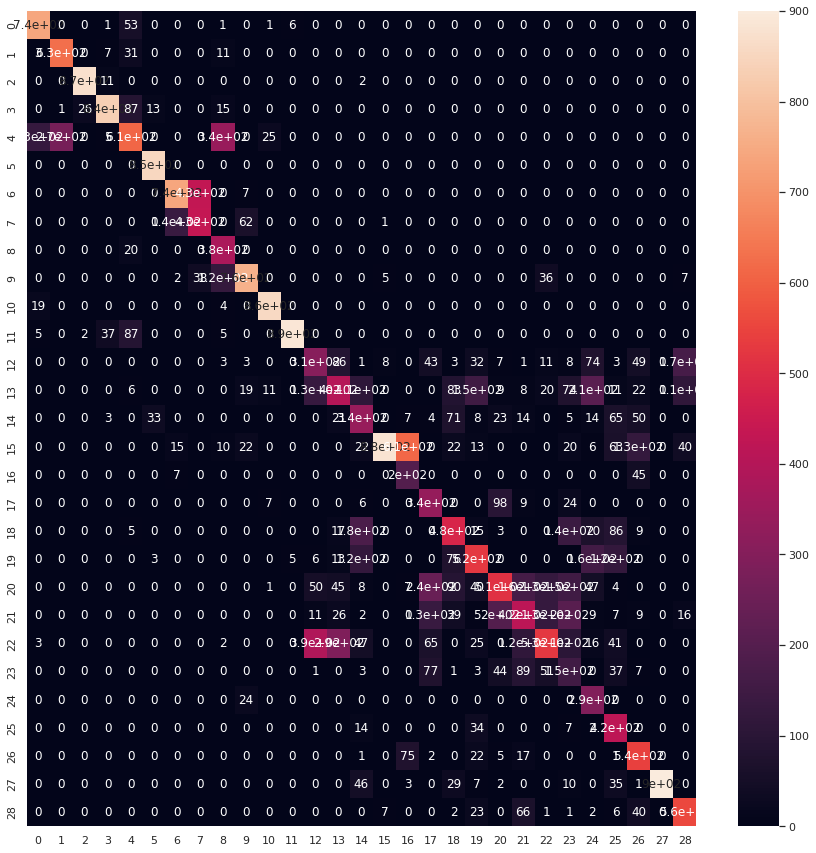

In [13]:
asl_clf.performance_report(asl_pred)

In [9]:
prediction

array([[1.0000000e+00, 2.9094014e-01, 4.4196645e-06, ..., 1.5244883e-07,
        7.8809145e-18, 9.8630004e-10],
       [1.0000000e+00, 3.3578396e-02, 1.9648969e-03, ..., 2.5861773e-06,
        2.3912531e-17, 5.8369869e-09],
       [1.0000000e+00, 6.3634066e-06, 5.6503733e-08, ..., 1.8788139e-10,
        6.6754168e-19, 7.3872616e-07],
       ...,
       [7.5644255e-04, 2.4264265e-05, 3.6897063e-03, ..., 1.5456447e-01,
        2.1625549e-02, 6.3061380e-01],
       [6.2519312e-04, 2.7310203e-05, 2.8334558e-03, ..., 5.0625956e-01,
        1.2016296e-03, 9.6436584e-01],
       [5.7253242e-04, 2.0477213e-05, 1.4480054e-03, ..., 4.3455973e-01,
        1.2156367e-03, 9.7700274e-01]], dtype=float32)

In [10]:
asl_pred = prediction > 0.5

In [11]:
asl_pred

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ..., False, False,  True]])

In [12]:
asl_clf.performance_report(asl_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

array([ 0,  0,  0, ..., 28, 28, 28])